Exercises and code samples for the course Unsupervised and Reinforcement Learning (AAI-URL) in the Bachelor of AAI at Rosenheim University of Applied Sciences.


# Centroid Initialization Methods

 
As k-means clustering aims to converge on an optimal set of cluster centers (centroids) and cluster membership based on distance from these centroids via successive iterations, it is intuitive that the more optimal the positioning of these initial centroids, the fewer iterations of the k-means clustering algorithms will be required for convergence. This suggests that some strategic consideration to the initialization of these initial centroids could prove useful. 

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


%matplotlib inline

## Various methods

In [83]:
def forgy(X, k, random_state=0):
    '''Return Randomly sampled points from the data'''
    return X[np.random.choice(range(X.shape[0]), replace = False, size = k), :]

def random_partition(X, k, random_state=0):
    '''Assign each point randomly to a cluster. 
    Then calculate the average data in each cluster to get the centers'''
    indices = np.random.choice(range(0, k), replace = True, size = X.shape[0])
    mean = []
    for count in range(k):
        mean.append(X[indices == count].mean(axis=0))
        
    return np.concatenate([val[ None, :] for val in mean], axis = 0)

def dist(data, centers):
    distance = np.sum((np.array(centers) - data[:, None, :])**2, axis = 2)
    return distance

def kmeans_plus_plus(X, k, pdf_method = True, random_state=0):
    '''Initialize one point at random.
    loop for k - 1 iterations:
        Next, calculate for each point the distance of the point from its nearest center. Sample a point with a 
        probability proportional to the square of the distance of the point from its nearest center.'''
    centers = []
    X = np.array(X)
    
    # Sample the first point
    initial_index = np.random.choice(range(X.shape[0]), )
    centers.append(X[initial_index, :].tolist())
    
    print('max: ', np.max(np.sum((X - np.array(centers))**2)))
    
    # Loop and select the remaining points
    for i in range(k - 1):
        print(i)
        distance = dist(X, np.array(centers))
        
        if i == 0:
            pdf = distance/np.sum(distance)
            centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf.flatten())]
        else:
            # Calculate the distance of each point from its nearest centroid
            dist_min = np.min(distance, axis = 1)
            if pdf_method == True:
                pdf = dist_min/np.sum(dist_min)# Sample one point from the given distribution
                centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf)]
            else:
                index_max = np.argmax(dist_min, axis = 0)
                centroid_new = X[index_max, :]
        centers.append(centroid_new.tolist())
        
    return np.array(centers)

def macqueen(X, k, random_state=0):
    return X [:k]

def maximin(X, k, random_state=0):
    X_ = np.copy(X)
    initial_centers = np.zeros((n_clusters, X_.shape[1]))
    X_norms = np.linalg.norm(X_, axis = 1)
    X_norms_max_i = X_norms.argmax()
    initial_centers[0] = X_[X_norms_max_i]
    X_ = np.delete(X_, X_norms_max_i, axis = 0)
    for i in range(1, n_clusters):
        distances = np.zeros((X_.shape[0], i))
        for index, center in enumerate(initial_centers[:i]):
            distances[:, index] = np.linalg.norm(X_ - center, axis = 1)

        max_min_index = distances.min(axis = 1).argmax()

        initial_centers[i] = X_[max_min_index]
        X_ = np.delete(X_, max_min_index, axis = 0)
        
    return initial_centers

## Creating Some Data

 
Clearly we will need some data. We will create a small synthetic set in order to have control over clearly delineating our clusters (see Figure 1).

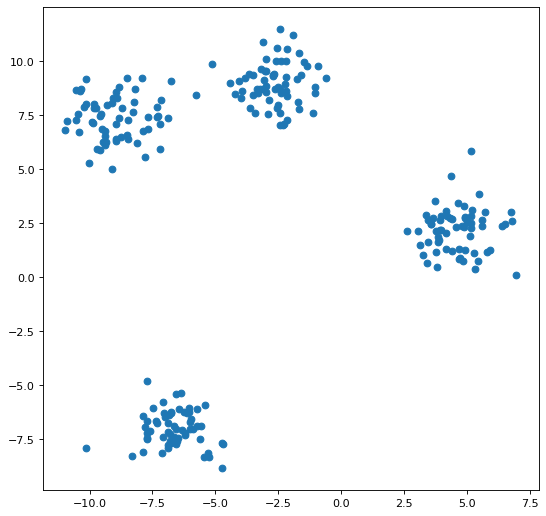

In [84]:
from sklearn.datasets import make_blobs

n_samples = 250
n_features = 2
n_clusters = 4
random_state = 42
max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1]);

## Initializing the Centroids

 
Let's initialize some centroids, using the implementation from above.

In [85]:
forgy_centroids = forgy(X, n_clusters)
print(forgy_centroids)

[[ -1.59379551   9.34303724]
 [-10.15856096   9.15498168]
 [ -6.77757983   9.07886376]
 [  3.0323956    2.15780354]]


In [86]:
random_centroids = random_partition(X, n_clusters)
print(random_centroids)

[[-3.91427177  2.95224836]
 [-3.25702632  2.95502537]
 [-3.75307298  2.92414901]
 [-2.56316576  2.75214523]]


In [87]:
plus_centroids = kmeans_plus_plus(X, n_clusters)
print(plus_centroids)


max:  30951.6214942322
0
1
2
[[ 4.16794697  3.06212028]
 [-9.87557391  7.13318424]
 [-6.02196757 -7.04004812]
 [-1.36637481  9.76621916]]


## Visualizing Centroid Initialization

 
Let's see how our centroids compare to each other, and to the data points, visually. We will call the plotting function below a number of subsequent times for comparison.

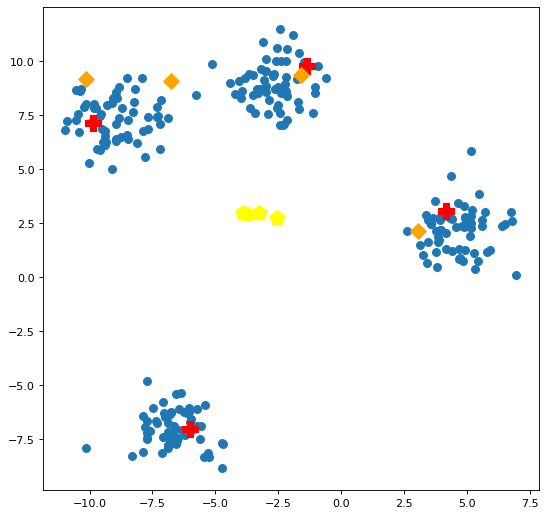

In [88]:
def centroid_plots(X, rand, plus, naive):
    fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
    
    plt.scatter(X[:, 0], X[:, 1],
                s=50,
                marker='o',
                label='cluster 1')

    plt.scatter(rand[:, 0], 
                rand[:, 1],
                s=200, c='yellow',
                marker='p')

    plt.scatter(plus[:, 0],
                plus[:, 1],
                s=200, c='red',
                marker='P')

    plt.scatter(naive[:, 0], 
                naive[:, 1],
                s=100, c='orange',
                marker='D');

centroid_plots(X, random_centroids, plus_centroids, forgy_centroids)

## Results

max:  26415.63530027713
0
1
2
max:  36190.95754411532
0
1
2
max:  46162.08287030751
0
1
2
max:  30056.89680911495
0
1
2


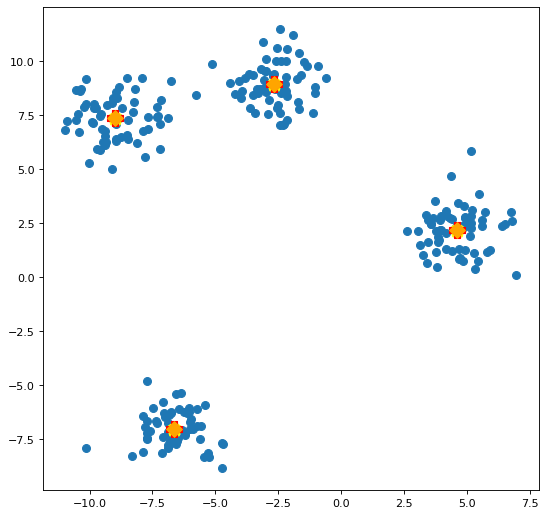

In [89]:
kmeans1 = KMeans(init=forgy, n_clusters=n_clusters, n_init=4, random_state=4)
kmeans1.fit(X)
forgy_centroids = kmeans1.cluster_centers_

kmeans2 = KMeans(init=random_partition, n_clusters=n_clusters, n_init=4, random_state=4)
kmeans2.fit(X)
random_centroids = kmeans2.cluster_centers_

kmeans3 = KMeans(init=kmeans_plus_plus, n_clusters=n_clusters, n_init=4, random_state=4)
kmeans3.fit(X)
plus_centroids = kmeans3.cluster_centers_

centroid_plots(X, random_centroids, plus_centroids, forgy_centroids)